<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
First element of X_train_all
(32, 32, 3)


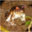

frog
Number of images = 50000 	| width = 32 	| height = 32 	| channels = 3
(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [ ]:

#from tensorflow import set_random_seed
#set_random_seed(4112)
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(4112)

import os
import numpy as np
import pandas as pd
import itertools
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import layers, models

from sklearn.metrics import confusion_matrix, classification_report

# To Explore the images
from IPython.display import display
from keras.preprocessing.image import array_to_img

from tensorflow.keras.utils import to_categorical


# Instantiate a one dimensional array of string containing the 10 category of images so that we can refer back to it later by index from 0 => 9
LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Loading the CIFAR10 dataset
# TODO: describe split of training and testing dataset (Provide references)
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()
print(type(x_train_all))
print(x_train_all.shape)
print(y_train_all.shape)
print(x_test.shape)
print(y_test.shape)

print("First element of X_train_all")
print(x_train_all[0].shape)

# An image
#print(f'First image in feature variables training dataset {x_train_all[0]}')
#plt.imshow(x_train_all[0])

pic = array_to_img(x_train_all[0])
display(pic)
#print(x_train[0][1])
#print(x_train[0][2])

print(LABEL_NAMES[y_train_all[0][0]])

number_of_images, x, y, c = x_train_all.shape
print(f'Number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

#======================
# Preparing the dataset
#======================

# Normalising data by scaling down the matrices values
x_train_all = x_train_all / 255.0
x_test = x_test / 255.0

# Performing One-Hot encoding on both sets
y_cat_train_all = to_categorical(y_train_all, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

#print(f'Y_TRAIN_ALL: {y_train_all}')
#print(f'Y_TEST: {y_test}')

x_val = x_train_all[:10000]
y_cat_val = y_cat_train_all[:10000]

x_train = x_train_all[10000:]
y_cat_train = y_cat_train_all[10000:]


#print(f'X_VAL: {x_val}')
#print(f'Y_VAL: {y_val}')

print(x_train.shape)
print(y_cat_train.shape)

print(x_val.shape)
print(y_cat_val.shape)

print(x_test.shape)
print(y_cat_test.shape)

#x_train, y_train = shuffle(x_train, y_train, random_state=42)

In [ ]:
#====================================
# Convolutional Neural Network setup
#====================================


def RELU():
    return "relu"


def SOFTMAX():
    return "softmax"


def EPOCHS():
    return 80

def LEARNING_RATE():
    return 0.00020

def init_cnn():
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation=RELU()),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Second Convolutional Layer
        layers.Conv2D(32, (3, 3), activation=RELU()),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(128, activation=RELU()),

        # Output Layer
        layers.Dense(10, activation=SOFTMAX())
    ])
    return model

model = init_cnn()
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE()),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,018 (621.16 KB)

 Trainable params: 159,018 (621.16 KB)

 Non-trainable params: 0 (0.00 B)

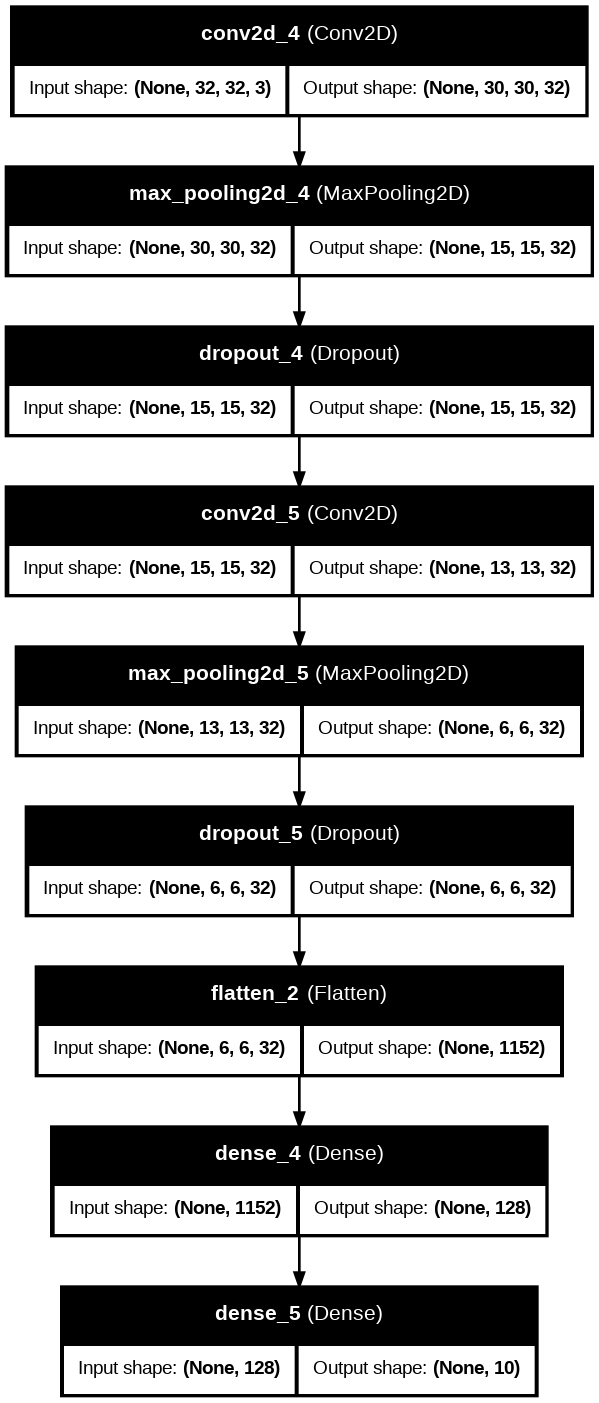

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="cnn_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [ ]:
def lr_callbackl():
  return tf.keras.callbacks.ReduceLROnPlateau(
      monitor='val_loss',
      factor=0.1,
      patience=2,
      min_lr=0.0001
  )

early_stopping = EarlyStopping(monitor='val_loss', patience=4)

history = model.fit(x_train,y_cat_train, epochs=EPOCHS(),validation_data=(x_val,y_cat_val),callbacks=[early_stopping,lr_callbackl()])

Epoch 1/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2523 - loss: 2.0335 - val_accuracy: 0.4418 - val_loss: 1.5937 - learning_rate: 2.0000e-04
Epoch 2/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4306 - loss: 1.5893 - val_accuracy: 0.4983 - val_loss: 1.4147 - learning_rate: 2.0000e-04
Epoch 3/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4821 - loss: 1.4473 - val_accuracy: 0.5272 - val_loss: 1.3313 - learning_rate: 2.0000e-04
Epoch 4/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5125 - loss: 1.3758 - val_accuracy: 0.5545 - val_loss: 1.2674 - learning_rate: 2.0000e-04
Epoch 5/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5341 - loss: 1.3170 - val_accuracy: 0.5750 - val_loss: 1.2160 - learning_rate: 2.0000e-04
Epoch 6/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5508 - loss: 1.2659 - val_accuracy: 0.5932 - val_loss: 1.1710 - learning_rate: 2.0000e-04
Epoch 7/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

In [27]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

    accuracy      loss  val_accuracy  val_loss  learning_rate
0   0.329475  1.850091        0.4418  1.593696         0.0002
1   0.448200  1.539662        0.4983  1.414665         0.0002
2   0.490425  1.422559        0.5272  1.331339         0.0002
3   0.520625  1.355191        0.5545  1.267411         0.0002
4   0.538650  1.298451        0.5750  1.216050         0.0002
5   0.554900  1.251517        0.5932  1.170956         0.0002
6   0.574475  1.205223        0.6085  1.130259         0.0002
7   0.586675  1.168591        0.6261  1.093958         0.0002
8   0.601425  1.136134        0.6358  1.068935         0.0002
9   0.610350  1.105451        0.6461  1.038579         0.0002
10  0.622650  1.080283        0.6543  1.013967         0.0002
11  0.629925  1.053867        0.6560  1.002398         0.0002
12  0.640200  1.032425        0.6658  0.978511         0.0002
13  0.645950  1.013268        0.6678  0.966812         0.0002
14  0.654600  0.994701        0.6691  0.963567         0.0002
15  0.66

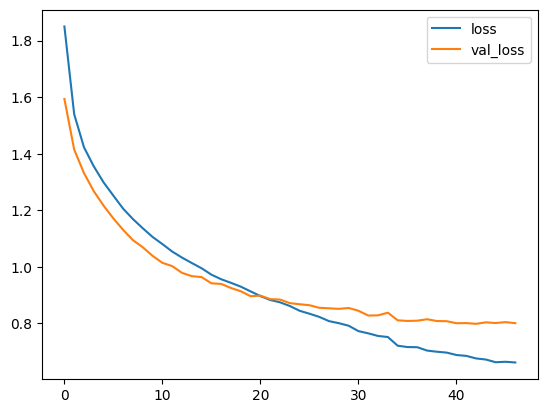

In [ ]:
metrics_df[["loss","val_loss"]].plot();

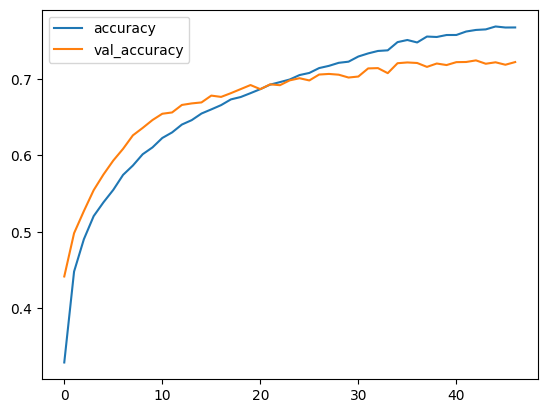

In [ ]:
metrics_df[["accuracy","val_accuracy"]].plot();

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7184 - loss: 0.8228


[0.8378555774688721, 0.713699996471405]

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1000
           1       0.82      0.82      0.82      1000
           2       0.68      0.55      0.61      1000
           3       0.54      0.52      0.53      1000
           4       0.61      0.71      0.66      1000
           5       0.59      0.61      0.60      1000
           6       0.73      0.84      0.78      1000
           7       0.82      0.72      0.77      1000
           8       0.81      0.82      0.81      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [ ]:
images = [
    x_test[28],
    x_test[12],
    x_test[235],
    x_test[4564],
    x_test[43],
    x_test[956],
    x_test[2002],
    x_test[8239],
    x_test[7632],
    x_test[9035]
    ]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
truck
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
deer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
frog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
frog


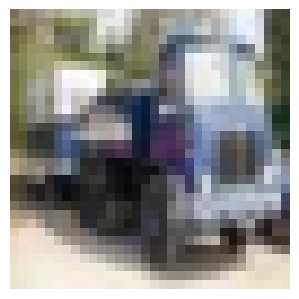

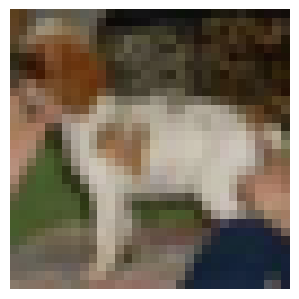

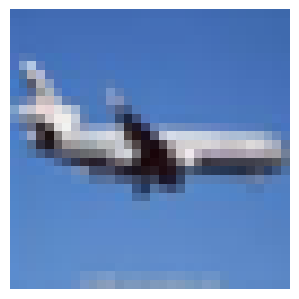

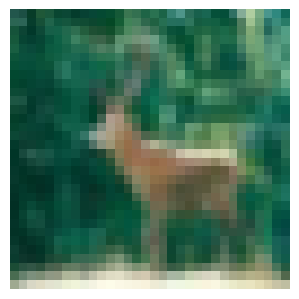

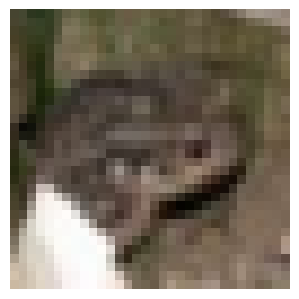

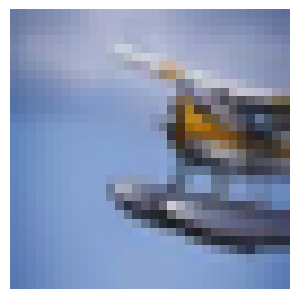

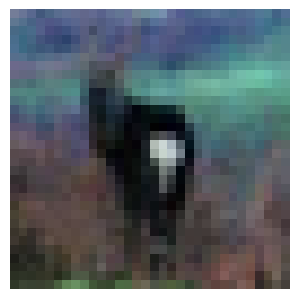

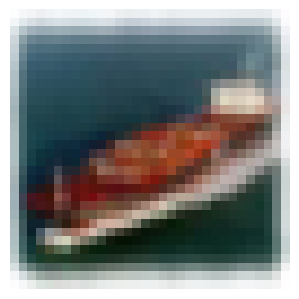

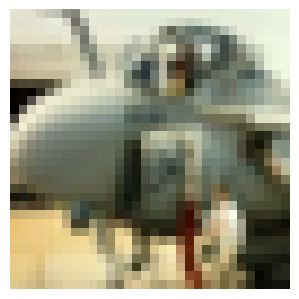

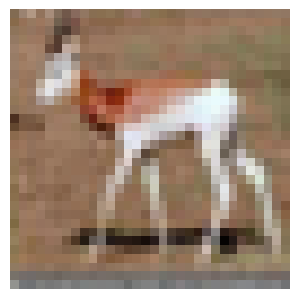

In [ ]:
for img in images:
    predictions = np.argmax(model.predict(img.reshape(1,32,32,3)), axis=-1)

    predicted_cat = print(LABEL_NAMES[predictions[0]])
    plt.figure(figsize=(15,8))
    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.title(predicted_cat)
    plt.axis("off")